<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means alghoritm

##1. Preparing the environment and uploading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
np.set_printoptions(precision=3, suppress=False)
pd.options.display.precision = 3

In [ ]:
raw_data = pd.read_csv('mall_customers.csv')
customers = raw_data.copy()

In [ ]:
customers.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customers.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000,200.000,200.000,200.000
mean,100.500,38.850,60.560,50.200
std,57.879,13.969,26.265,25.824
min,1.000,18.000,15.000,1.000
25%,50.750,28.750,41.500,34.750
50%,100.500,36.000,61.500,50.000
75%,150.250,49.000,78.000,73.000
max,200.000,70.000,137.000,99.000


In [ ]:
customers['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


##2. Hand-made alghoritm

In [ ]:
customers = customers[['Age', 'Spending Score']]

In [ ]:
centroids = customers.sample(n=2)
centroids

,Age,Spending Score
74,59,47
73,60,56


In [ ]:
def fetch_coordinates(centroids):
  age_centroid_1 = centroids.iloc[0, 0]
  score_centroid_1 = centroids.iloc[0, 1]
  age_centroid_2 = centroids.iloc[1, 0]
  score_centroid_2 = centroids.iloc[1, 1]
  return age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2

In [ ]:
age_centroid_1, score_centroid_1, \
age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)

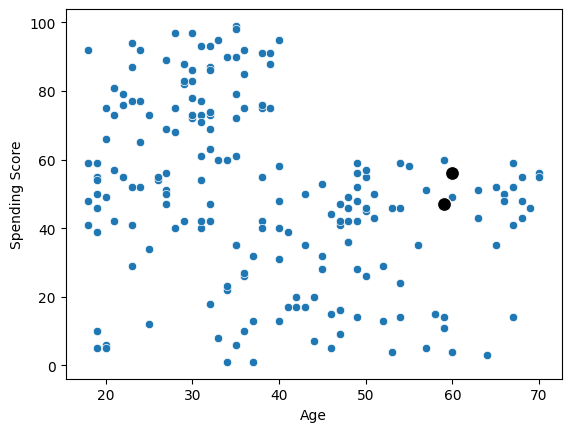

In [ ]:
sns.scatterplot(data=customers, x="Age", y="Spending Score")
sns.scatterplot(data=centroids, x="Age", y="Spending Score",
                s=100, color='black')
plt.show()

In [ ]:
def calculate_distance(row, age, score):
  return np.sqrt((row['Age'] - age)**2 + (row['Spending Score'] - score)**2)

In [ ]:
customers['dist_centroid_1'] = customers.apply(
    lambda x: calculate_distance(x, age_centroid_1, score_centroid_1), axis=1
    )
customers['dist_centroid_2'] = customers.apply(
    lambda x: calculate_distance(x, age_centroid_2, score_centroid_2), axis=1
    )

In [ ]:
customers.head()

,Age,Spending Score,dist_centroid_1,dist_centroid_2
0,19,39,40.792,44.385
1,21,81,50.990,46.325
2,20,6,56.586,64.031
3,23,77,46.861,42.544
4,31,40,28.862,33.121


In [ ]:
def calculate_distance_assign_clusters(customers, centroids):
  age_c1, score_c1, age_c2, score_c2 = fetch_coordinates(centroids)
  customers['dist_centroid_1'] = customers.apply(
    lambda x: calculate_distance(x, age_c1, score_c1), axis=1
    )
  customers['dist_centroid_2'] = customers.apply(
    lambda x: calculate_distance(x, age_c2, score_c2), axis=1
    )
  customers['cluster'] = customers.apply(
    lambda x: 1 if x['dist_centroid_1'] < x['dist_centroid_2'] else 2, axis=1
    )

In [ ]:
calculate_distance_assign_clusters(customers, centroids)

In [ ]:
customers['cluster'].value_counts()

,count
cluster,
1,116
2,84


In [ ]:
customers.head()

,Age,Spending Score,dist_centroid_1,dist_centroid_2,cluster
0,19,39,40.792,44.385,1
1,21,81,50.990,46.325,2
2,20,6,56.586,64.031,1
3,23,77,46.861,42.544,2
4,31,40,28.862,33.121,1


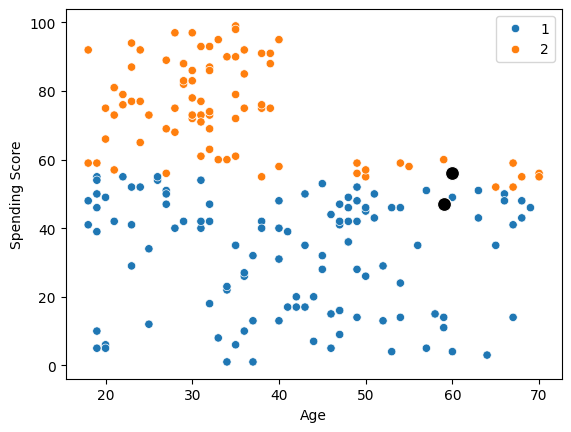

In [ ]:
sns.scatterplot(data=customers, x="Age", y="Spending Score",
                hue='cluster', palette='tab10')
sns.scatterplot(data=centroids, x="Age", y="Spending Score",
                s=100, color='black')
plt.show()

In [ ]:
new_centroids = customers.groupby(['cluster']).mean()\
 [['Age', 'Spending Score']].reset_index().drop('cluster', axis=1)
new_centroids

,Age,Spending Score
0,41.767,32.56
1,34.821,74.56


In [ ]:
calculate_distance_assign_clusters(customers, new_centroids)

In [ ]:
customers

,Age,Spending Score,dist_centroid_1,dist_centroid_2,cluster
0,19,39,23.660,38.920,1
1,21,81,52.704,15.248,2
2,20,6,34.340,70.143,1
3,23,77,48.240,12.071,2
4,31,40,13.087,34.770,1
...,...,...,...,...,...
195,35,79,46.930,4.444,2
196,45,28,5.590,47.659,1
197,32,74,42.575,2.876,2
198,32,18,17.533,56.630,1


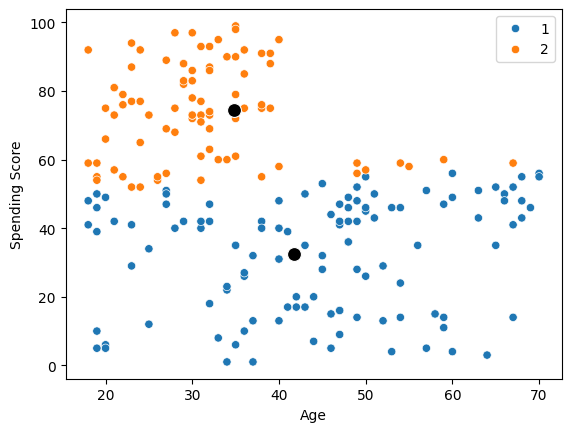

In [ ]:
sns.scatterplot(data=customers, x="Age", y="Spending Score",
                hue='cluster', palette='tab10')
sns.scatterplot(data=new_centroids, x="Age", y="Spending Score",
                s=100, color='black')
plt.show()

In [ ]:
def create_clusters(customers, steps):
  centroids = customers.sample(n=2)
  calculate_distance_assign_clusters(customers, centroids)
  for i in range(steps):
    new_centroids = customers.groupby(['cluster']).mean()\
      [['Age', 'Spending Score']].reset_index().drop('cluster', axis=1)
    calculate_distance_assign_clusters(customers, new_centroids)
  return customers['cluster']

In [ ]:
create_clusters(customers, 6)

,cluster
0,2
1,1
2,2
3,1
4,2
...,...
195,1
196,2
197,1
198,2


##3. Iterative K-Means alghoritm

In [ ]:
customers = raw_data.copy()
cols_to_keep = ['Annual Income', 'Spending Score']

In [ ]:
customers = customers.loc[:, cols_to_keep]

In [ ]:
customers.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
def get_centroids(df, k):
  centroids = df.sample(n=k).reset_index(drop=True)
  return centroids, centroids.values.tolist()

In [ ]:
centroids, coords = get_centroids(customers, 2)
print(centroids)
print(coords)

   Annual Income  Spending Score
0             44              46
1             39              65
[[44, 46], [39, 65]]


In [ ]:
list(enumerate(coords))

[(0, [44, 46]), (1, [39, 65])]

In [ ]:
def calculate_distance(df, centroids_coords):
    names = []
    for i, centroid in enumerate(centroids_coords):
      dist = np.sqrt((df.iloc[:, 0] - centroid[0])**2 + (df.iloc[:, 1] - centroid[1])**2)
      name = 'dist_centroid_' + str(i+1)
      df[name] = dist
      names.append(name)
    return df, names

In [ ]:
customers, dist_names = calculate_distance(customers, coords)